# **PREDICTING CARDIOVASCULAR HEALTH WITH 19 LIFESTYLE FACTORS**

### By: Michelle Chang, Akshat Iyer, Ida Isugi




# **Abstract**

**OVERALL**

In our project, we sought to analyze various machine learning models that best predict General Cardiovascular Health given 19 lifestyle factors in 2021. The Kaggle dataset we referred to can be found [here](https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset).


Specifically, we will be tuning various machine learning models, based on the models we learned in class.

**MODELS**

Our baseline model will be a Logistic Regression Model.

Then, for rigorous study, we will do unsupervised machine learning to find the factors deemed most important via k-Means clustering or PCA.

Using or not using these factors from unsupervised machine learning, we can tune supervised machine learning models that can predict a cardiovascular patient's General Health.

**CREATIVITY**

We will compare these models' accuracies to a model generated with AutoML (ie. AutoPytorch).

**ULTIMATE GOAL**

In doing so, we can not only compare the factors found as most correlated with high General Health for cardiovascular patients in 2021, but also the effectiveness of automated Machine Learning compared with our class models.


# **Section 0: Setup & Library Imports**

In [ ]:
%%capture
!pip install opendatasets
!pip install pandas
!pip install seaborn
!pip install matplotlib.pyplot
!pip install numpy
!pip install sklearn.model_selection
!pip install sklearn.linear_model
!pip install sklearn.metrics
!pip install sklearn.preprocessing
!pip install sklearn.decomposition
!pip install mpl_toolkits.mplot3d
!pip install autosklearn

In [ ]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

od.download(
    "https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset")


Skipping, found downloaded files in "./cardiovascular-diseases-risk-prediction-dataset" (use force=True to force download)


# **Section 1: Data Loading & Preprocessing**

Load the datasets analyzing Cardiovascular patients from kaggle into the pandas DataFrames as patients_df

In [ ]:
# reading the CSV file for 2021
patients_df = pd.read_csv('./cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')

# displaying the contents of the CSV file
patients_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# **Data Cleaning**

Summary of the dataframe: 19 columns and 308854 rows.

The `Non-Null Count` for each column is equal to 308854 AKA the total number of rows. Thus, we know that there are no `NULL` values in any of the columns.

In [ ]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

# Cleaning

First, we create a copy of patients_cleaned_df.

We drop all NaNs.

Then, we drop all columns that we don't need in our analysis. The column we don't need is `Checkup` because we don't plan on mapping when the patient checked up with the patient's overall health.

In [ ]:
patients_cleaned_df = patients_df.copy()

# Drop rows with NaN values
patients_cleaned_df = patients_cleaned_df.dropna()
patients_cleaned_df = patients_cleaned_df.dropna(subset=patients_cleaned_df.select_dtypes(include=['float64']).columns)

# Drop the Checkup column
patients_cleaned_df = patients_cleaned_df.drop(columns=['Checkup'])

Note that the columns `Exercise`, `Heart_Disease`, `Skin_Cancer`, `Other_Cancer`, `Depression`, `Arthritis`, `Smoking_History` are all Yes or No, instead of a numeric value.

Meanwhile, the column `Diabetes` has 4 unique values: 'No', 'Yes', 'No, pre-diabetes or borderline diabetes', and 'Yes, but female told only during pregnancy'.

 For simplicity, we will regard 'No, pre-diabetes or borderline diabetes' as 'No' and 'Yes, but female told only during pregnancy' as 'Yes.'

In [ ]:
print(patients_df['Exercise'].unique())
print(patients_df['Skin_Cancer'].unique())
print(patients_df['Other_Cancer'].unique())
print(patients_df['Depression'].unique())
print(patients_df['Diabetes'].unique())
print(patients_df['Arthritis'].unique())
print(patients_df['Smoking_History'].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
['Yes' 'No']
['Yes' 'No']


We need to reassign these columns to `does_exercise`, `has_heart_disease`, `has_skin_cancer`, `has_other_cancer`, `has_depression`, `has_diabetes`, `has_arthritis`, and `has_smoking_history`, and make sure that each column contains a value of **1** if the answer is YES and a value of **0** if NO.

Afterwards, we drop all the old columns that we don't need anymore.

In [ ]:
# Create the new columns, and map Yes to 1 and No to 0
patients_cleaned_df['exercises'] = patients_cleaned_df['Exercise'].map({'Yes': 1, 'No': 0})
patients_cleaned_df['has_heart_disease'] = patients_cleaned_df['Heart_Disease'].map({'Yes': 1, 'No': 0})
patients_cleaned_df['has_skin_cancer'] = patients_cleaned_df['Skin_Cancer'].map({'Yes': 1, 'No': 0})
patients_cleaned_df['has_other_cancer'] = patients_cleaned_df['Other_Cancer'].map({'Yes': 1, 'No': 0})
patients_cleaned_df['has_depression'] = patients_cleaned_df['Depression'].map({'Yes': 1, 'No': 0})
patients_cleaned_df['has_diabetes'] = patients_cleaned_df['Diabetes'].map({'Yes': 1, 'No': 0, 'No, pre-diabetes or borderline diabetes' : 0, 'Yes, but female told only during pregnancy' : 1})
patients_cleaned_df['has_arthritis'] = patients_cleaned_df['Arthritis'].map({'Yes': 1, 'No': 0})
patients_cleaned_df['has_smoked'] = patients_cleaned_df['Smoking_History'].map({'Yes': 1, 'No': 0})

# Drop all the old columns that we don't need anymore (that contain Yes or No)
patients_cleaned_df = patients_cleaned_df.drop(columns=[
    'Exercise',
    'Heart_Disease',
    'Skin_Cancer',
    'Other_Cancer',
    'Depression',
    'Diabetes',
    'Arthritis',
    'Smoking_History'
])

#Check Datatypes after everything
patients_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Sex                           308854 non-null  object 
 2   Age_Category                  308854 non-null  object 
 3   Height_(cm)                   308854 non-null  float64
 4   Weight_(kg)                   308854 non-null  float64
 5   BMI                           308854 non-null  float64
 6   Alcohol_Consumption           308854 non-null  float64
 7   Fruit_Consumption             308854 non-null  float64
 8   Green_Vegetables_Consumption  308854 non-null  float64
 9   FriedPotato_Consumption       308854 non-null  float64
 10  exercises                     308854 non-null  int64  
 11  has_heart_disease             308854 non-null  int64  
 12  has_skin_cancer               308854 non-nul

Note that the column `Sex` is not a numeric value, it gives Male or Female. Let's rename it to `is_male`, and return 1 if Male or 0 otherwise.

In [ ]:
# Create the 'is_male' column
patients_cleaned_df['is_male'] = patients_cleaned_df['Sex'].map({'Male': 1, 'Female': 0})

# Drop the unncecessary 'Sex' Column
patients_cleaned_df = patients_cleaned_df.drop(columns=['Sex'])
patients_cleaned_df

,General_Health,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,exercises,has_heart_disease,has_skin_cancer,has_other_cancer,has_depression,has_diabetes,has_arthritis,has_smoked,is_male
0,Poor,70-74,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,0,0,0,0,1,1,0
1,Very Good,70-74,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,1,0,0,0,1,0,0,0
2,Very Good,60-64,163.0,88.45,33.47,4.0,12.0,3.0,16.0,1,0,0,0,0,1,0,0,0
3,Poor,75-79,180.0,93.44,28.73,0.0,30.0,30.0,8.0,1,1,0,0,0,1,0,0,1
4,Good,80+,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,25-29,168.0,81.65,29.05,4.0,30.0,8.0,0.0,1,0,0,0,0,0,0,0,1
308850,Fair,65-69,180.0,69.85,21.48,8.0,15.0,60.0,4.0,1,0,0,0,0,1,0,0,1
308851,Very Good,30-34,157.0,61.23,24.69,4.0,40.0,8.0,4.0,1,0,0,0,1,1,0,1,0
308852,Very Good,65-69,183.0,79.38,23.73,3.0,30.0,12.0,0.0,1,0,0,0,0,0,0,0,1


Note that the column `General_Health` is not a numeric value, it gives Poor, Fair, Good, Very Good, or Excellent. We can make sure there are only 5 unique values in `General_Health` using the .nunique() method.

Also note that column `Age_Category` is not a numeric value, it gives a range of ages. We can make sure there are only 13 unique values in `General_Health` using the .nunique() method.


In [ ]:
# Make sure there are only 5 unique values for General Health using .unique() and .nunique()
print(patients_cleaned_df['General_Health'].unique())
print(patients_cleaned_df['General_Health'].nunique())

# Make sure there are only 13 unique values for using .unique() and .nunique()
sorted_age_categories = sorted(patients_cleaned_df['Age_Category'].unique())
print(sorted_age_categories)
print(patients_cleaned_df['Age_Category'].nunique())

['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
5
['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
13


Regardless, let's rename `General_Health` to `health_rating`, and return 0, 1, 2, 3, 4.

Let's also rename `Age_Category` to `age_range` and return a number from 0 to 12.

In [ ]:
# Rename General_Health to health_rating and Age_Category to age_range
patients_cleaned_df = patients_cleaned_df.rename(columns={'General_Health': 'health_rating'})
patients_cleaned_df = patients_cleaned_df.rename(columns={'Age_Category': 'age_range'})

# Map categorical values to numerical values for General_Health
health_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
patients_cleaned_df['health_rating'] = patients_cleaned_df['health_rating'].map(health_mapping)

# Map categorical values to numerical values for Age_Category
age_mapping = { '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,'45-49': 5,'50-54': 6, '55-59': 7,
'60-64': 8,'65-69': 9, '70-74': 10, '75-79': 11,'80+': 12
}
patients_cleaned_df['age_range'] = patients_cleaned_df['age_range'].map(age_mapping)

# Display the DataFrame
patients_cleaned_df

,health_rating,age_range,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,exercises,has_heart_disease,has_skin_cancer,has_other_cancer,has_depression,has_diabetes,has_arthritis,has_smoked,is_male
0,0,10,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,0,0,0,0,1,1,0
1,3,10,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,1,0,0,0,1,0,0,0
2,3,8,163.0,88.45,33.47,4.0,12.0,3.0,16.0,1,0,0,0,0,1,0,0,0
3,0,11,180.0,93.44,28.73,0.0,30.0,30.0,8.0,1,1,0,0,0,1,0,0,1
4,2,12,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,1,168.0,81.65,29.05,4.0,30.0,8.0,0.0,1,0,0,0,0,0,0,0,1
308850,1,9,180.0,69.85,21.48,8.0,15.0,60.0,4.0,1,0,0,0,0,1,0,0,1
308851,3,2,157.0,61.23,24.69,4.0,40.0,8.0,4.0,1,0,0,0,1,1,0,1,0
308852,3,9,183.0,79.38,23.73,3.0,30.0,12.0,0.0,1,0,0,0,0,0,0,0,1


Finally, we can rename the columns so that they don't contain extraneous units (ex. `Height_(cm)`) and are lowercase for conventionality.

In [ ]:
# Remove units and make lowercase
patients_cleaned_df = patients_cleaned_df.rename(columns={
    'Height_(cm)': 'height_cm',
    'Weight_(kg)': 'weight_kg',
    'BMI': 'bmi',
    'Alcohol_Consumption' : 'alcohol_consumed',
    'Fruit_Consumption' : 'fruit_consumed',
    'Green_Vegetables_Consumption' : 'vegetable_consumed',
    'FriedPotato_Consumption' : 'fried_potato_consumed',
})

patients_cleaned_df

,health_rating,age_range,height_cm,weight_kg,bmi,alcohol_consumed,fruit_consumed,vegetable_consumed,fried_potato_consumed,exercises,has_heart_disease,has_skin_cancer,has_other_cancer,has_depression,has_diabetes,has_arthritis,has_smoked,is_male
0,0,10,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,0,0,0,0,1,1,0
1,3,10,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,1,0,0,0,1,0,0,0
2,3,8,163.0,88.45,33.47,4.0,12.0,3.0,16.0,1,0,0,0,0,1,0,0,0
3,0,11,180.0,93.44,28.73,0.0,30.0,30.0,8.0,1,1,0,0,0,1,0,0,1
4,2,12,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,1,168.0,81.65,29.05,4.0,30.0,8.0,0.0,1,0,0,0,0,0,0,0,1
308850,1,9,180.0,69.85,21.48,8.0,15.0,60.0,4.0,1,0,0,0,0,1,0,0,1
308851,3,2,157.0,61.23,24.69,4.0,40.0,8.0,4.0,1,0,0,0,1,1,0,1,0
308852,3,9,183.0,79.38,23.73,3.0,30.0,12.0,0.0,1,0,0,0,0,0,0,0,1


In [ ]:
patients_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   health_rating          308854 non-null  int64  
 1   age_range              308854 non-null  int64  
 2   height_cm              308854 non-null  float64
 3   weight_kg              308854 non-null  float64
 4   bmi                    308854 non-null  float64
 5   alcohol_consumed       308854 non-null  float64
 6   fruit_consumed         308854 non-null  float64
 7   vegetable_consumed     308854 non-null  float64
 8   fried_potato_consumed  308854 non-null  float64
 9   exercises              308854 non-null  int64  
 10  has_heart_disease      308854 non-null  int64  
 11  has_skin_cancer        308854 non-null  int64  
 12  has_other_cancer       308854 non-null  int64  
 13  has_depression         308854 non-null  int64  
 14  has_diabetes           308854 non-nu

# **Section 2: Exploratory Data Analysis**

As stated in Homework 4, Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

**Visualization**

For each `age_range`, we want to find the number of Poor, Fair, Good, Very Good, Excellent in each age range using the number ranged from 0 to 5 in the `health_rating` column. Remember that we mapped `General_Health`to `age_range` as 0, 1, 2, 3, 4 in Section 1.

We are using the Seaborn library for this problem to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html).


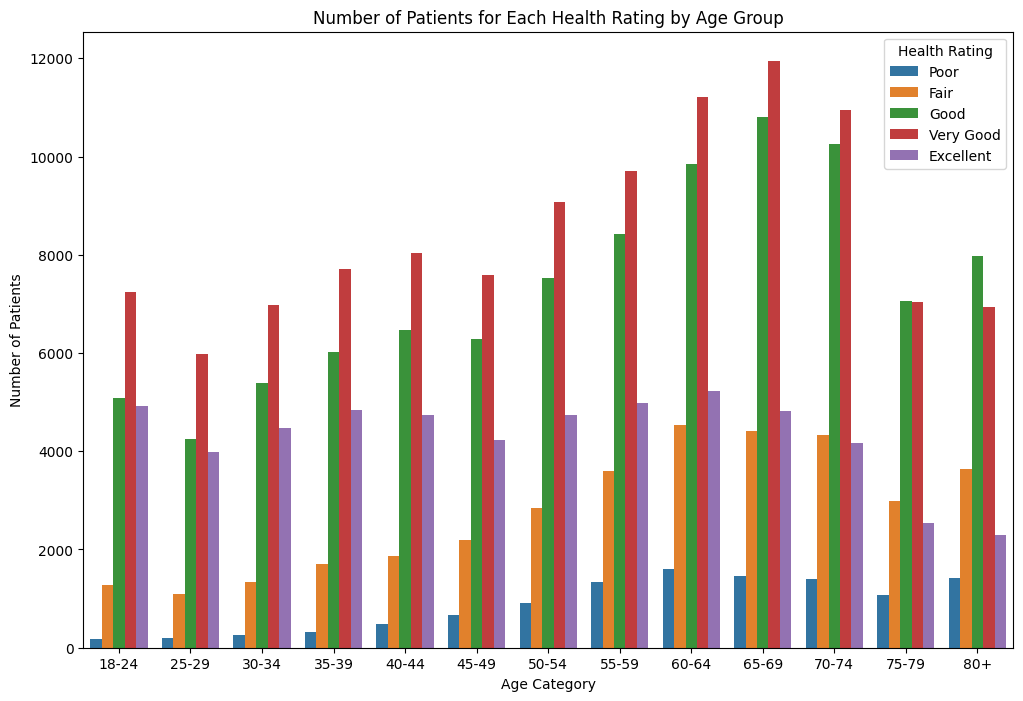

In [ ]:
# Set up the order for better plotting
health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create a count plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='age_range', hue='health_rating', data=patients_cleaned_df, hue_order=range(5))

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.title('Number of Patients for Each Health Rating by Age Group')
# Change x-axis labels to age ranges
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'])

# Show the legend
plt.legend(title='Health Rating', labels=health_order)

# Show the plot
plt.show()

# Display the count of each value in the 'health_rating' column for each 'Age_Category'
for age_category in range(13):
    count_by_rating = patients_cleaned_df[patients_cleaned_df['age_range'] == age_category]['health_rating'].value_counts()

Create **`average_heart_disease_df`**, **`average_depression_df`**, and **`average_smoked_df`**

These dataframes represent the average number of people with a heart disease(`has_heart_disease`), depression (`has_depression`), or who have smoked before (`has_smoked`) respectivily by grouping by the `health_rating` and `age_range`. From each new dataframe we will create a scatter plot to show the relation between the average of the number of people with a heart disease(`has_heart_disease`), depression (`has_depression`), or who have smoked before (`has_smoked`) in relation to their `health_rating` and `age_range`.

In [ ]:
# To create average_heart_disease_df find the mean of has_heart_disease, group by health_rating
average_heart_disease_df = patients_cleaned_df.groupby(by=['health_rating', 'age_range'], as_index=False)['has_heart_disease'].mean().reset_index(drop=True)
average_heart_disease_df.head(10)

,health_rating,age_range,has_heart_disease
0,0,0,0.022222
1,0,1,0.055276
2,0,2,0.115830
3,0,3,0.094225
4,0,4,0.167355
5,0,5,0.186289
6,0,6,0.245365
7,0,7,0.284866
8,0,8,0.318832
9,0,9,0.336770


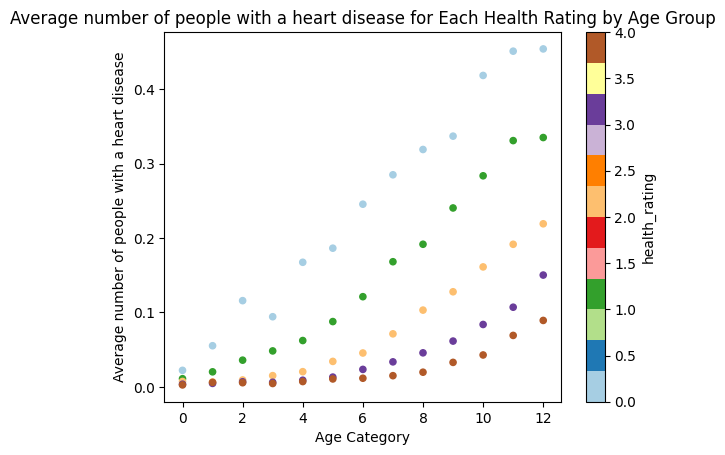

<Figure size 800x600 with 0 Axes>

In [ ]:
# Create a scatter plot
average_heart_disease_df.plot.scatter(x= 'age_range', y = 'has_heart_disease', c = 'health_rating', colormap='Paired')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Average number of people with a heart disease')
plt.title('Average number of people with a heart disease for Each Health Rating by Age Group')
plt.figure(figsize=(8, 6))
# Show the plot
plt.show()

In [ ]:
# To create average_depression_df find the mean of has_depression, group by health_rating
average_depression_df = patients_cleaned_df.groupby(by=['health_rating', 'age_range'], as_index=False)['has_depression'].mean().reset_index(drop=True)
average_depression_df.head(10)

,health_rating,age_range,has_depression
0,0,0,0.633333
1,0,1,0.638191
2,0,2,0.625483
3,0,3,0.626140
4,0,4,0.652893
5,0,5,0.587183
6,0,6,0.576881
7,0,7,0.537834
8,0,8,0.461156
9,0,9,0.426804


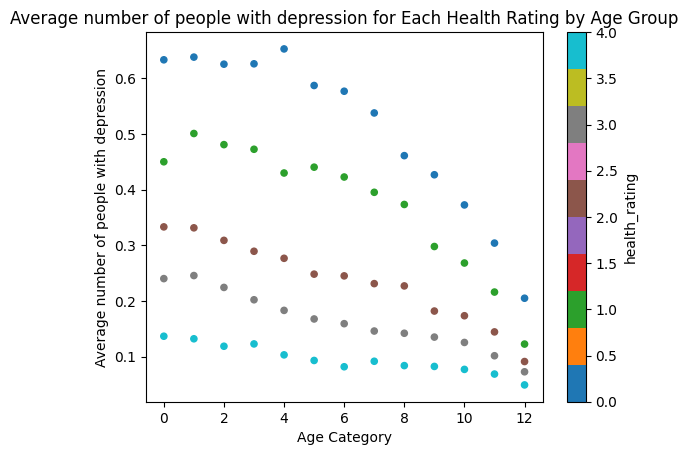

<Figure size 800x600 with 0 Axes>

In [ ]:
# Create a scatter plot
average_depression_df.plot.scatter(x= 'age_range', y = 'has_depression', c = 'health_rating', colormap='tab10')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Average number of people with depression')
plt.title('Average number of people with depression for Each Health Rating by Age Group')
plt.figure(figsize=(8, 6))
# Show the plot
plt.show()

In [ ]:
# To create average_smoked_df find the mean of has_smoked, group by health_rating
average_smoked_df = patients_cleaned_df.groupby(by=['health_rating', 'age_range'], as_index=False)['has_smoked'].mean().reset_index(drop=True)
average_smoked_df.head(10)

,health_rating,age_range,has_smoked
0,0,0,0.338889
1,0,1,0.457286
2,0,2,0.571429
3,0,3,0.601824
4,0,4,0.663223
5,0,5,0.637854
6,0,6,0.643402
7,0,7,0.660979
8,0,8,0.691112
9,0,9,0.647423


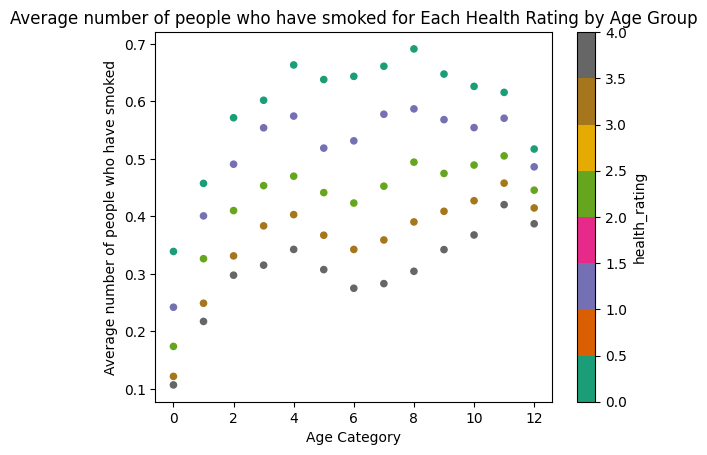

<Figure size 800x600 with 0 Axes>

In [ ]:
# Create a scatter plot
average_smoked_df.plot.scatter(x= 'age_range', y = 'has_smoked', c = 'health_rating', colormap='Dark2')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Average number of people who have smoked')
plt.title('Average number of people who have smoked for Each Health Rating by Age Group')
plt.figure(figsize=(8, 6))
# Show the plot
plt.show()

**Correlation Heatmap** for `health_rating` and all the other columns representing an individuals lifestyle `bmi`, `alcohol_consumed`, `fruit_consumed`, `vegetable_consumed`, `fried_potato_consumed`, `exercises`, and `has_smoked`.

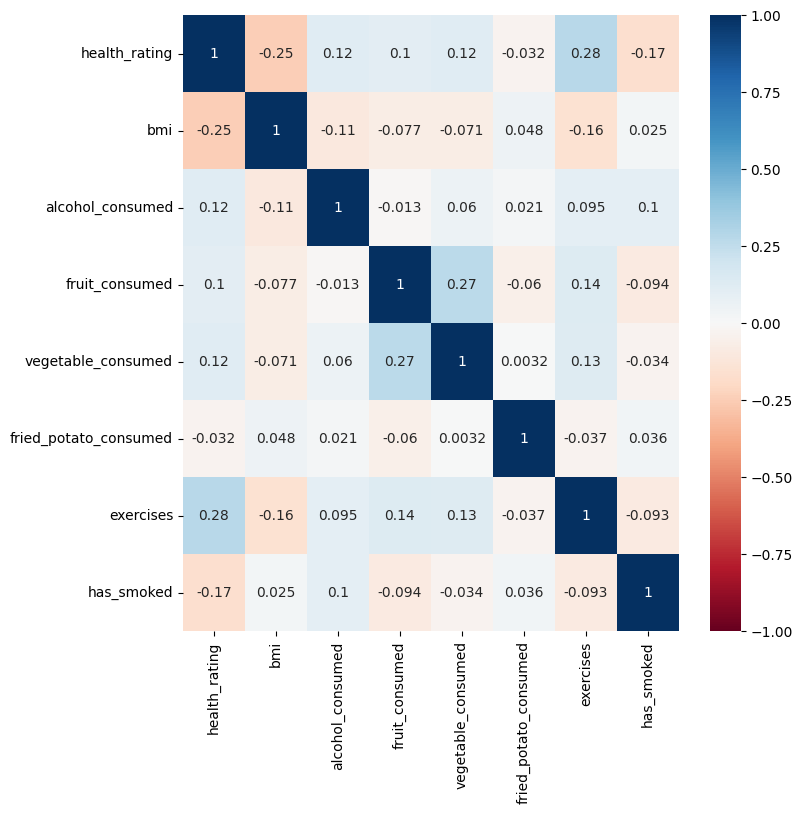

In [ ]:
lifestyle_df = patients_cleaned_df[['health_rating', 'bmi', 'alcohol_consumed', 'fruit_consumed', 'vegetable_consumed', 'fried_potato_consumed', 'exercises', 'has_smoked']]
corr_mat = lifestyle_df.corr()
plt.figure(figsize=(8,8))
dataplot = sns.heatmap(corr_mat, vmin = -1, vmax = 1, cmap='RdBu', annot=True)
plt.show()

**Correlation Heatmap** for `health_rating` and all the other columns representing diseases `has_heart_disease`, `has_skin_cancer`, `has_other_cancer`, `has_depression`, `has_diabetes`, and `has_arthritis`.

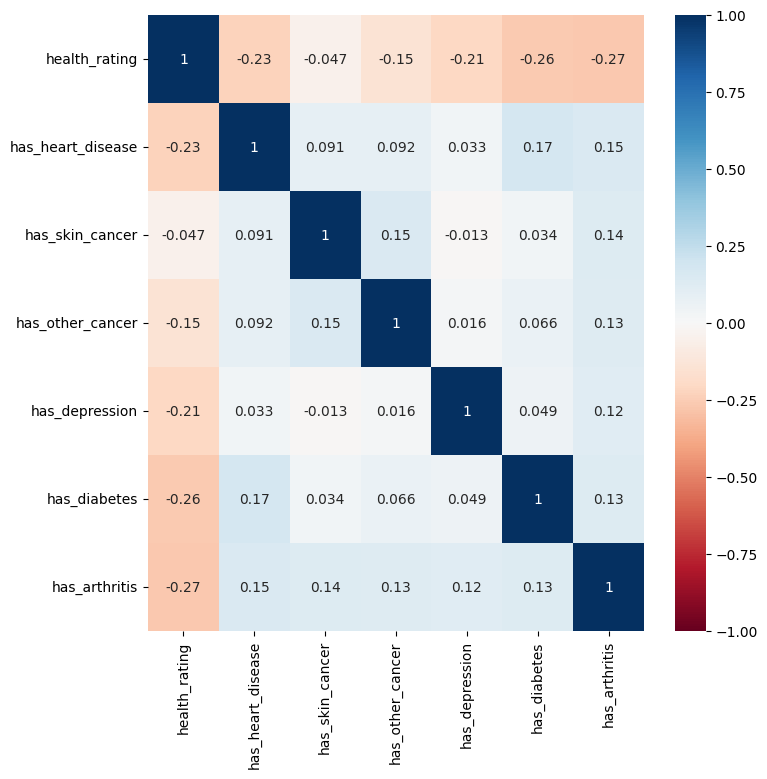

In [ ]:
disease_df = patients_cleaned_df[['health_rating', 'has_heart_disease', 'has_skin_cancer', 'has_other_cancer', 'has_depression', 'has_diabetes', 'has_arthritis']]
corr_mat = disease_df.corr()
plt.figure(figsize=(8,8))
dataplot = sns.heatmap(corr_mat, vmin = -1, vmax = 1, cmap='RdBu', annot=True)
plt.show()

# **Section 3: Modeling with ML learned in Class [TODO]**

# Preprocessing: Features, Labels, and Splitting Data into Train and Test

Note: we will work with various models and attempt to predict the `health_rating` of the patient.

The features will be all the variables in the dataset except `health_rating`, which will act as the label for our problem.

First, store these two as features (pd.DataFrame) and target (pd.Series), respectively.

In [ ]:
# Stores features dataframe into variable called "features"
features = patients_cleaned_df.drop(columns=['health_rating'])

# Store the classification target variable into "target"
target = patients_cleaned_df['health_rating']

We now use Scikit-learn's train_test_split function to split data for regression into training and testing sets. The split should be 80-20 meaning 80% for training and the rest for testing.

We set the seed variable to 42 and then set the parameter to random_state = seed and store the resulting splits as X_train, X_test, y_train, and y_test.

In [ ]:
# Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

# Baseline Model: Logistic Regression

Our second Baseline Model we will implement is the Logistic Regression model.

We fit a Logistic Regression model on the X_train and y_train.

We then Calculate the accuracy of the model on the test set using the score method and store it in a variable named log_acc.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize model with the parameters mentioned above and fit it on the training set
logistic_reg = LogisticRegression(penalty='none', multi_class='multinomial', random_state=seed)
logistic_reg.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = logistic_reg.predict(X_test)

# Find the accuracy and store in `log_acc`
log_acc = accuracy_score(y_test, y_pred)

log_acc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3944083793365819

# Baseline Model: Random Forest Classifier

Our second Baseline Model we will implement is the Random Forest Classifier.

We fit a Random Forest classifier on the X_train and y_train.

We then Calculate the accuracy of the model on the test set using the score method and store it in a variable named rf_acc. We also save the confusion matrix for further data visualization.

In [ ]:
# TODO: Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# TODO: Initialize model with given parameters and fit it on the training set
random_forest = RandomForestClassifier(class_weight='balanced', n_estimators=120, max_depth=30, random_state=42) #changed estimators to 500 for experimentation
random_forest.fit(X_train, y_train)

# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
rf_pred = random_forest.predict(X_test)

# TODO: Find the accuracy and store the value in `rf_acc`
rf_acc = accuracy_score(y_test, rf_pred)

# TODO: Compute the confusion matrix.
rf_confusion = confusion_matrix(y_test, rf_pred)

# self-check
rf_acc, rf_confusion

(0.4057729355199042,
 array([[  192,   658,  1087,   294,    34],
        [  235,  1237,  3848,  1645,   201],
        [  152,  1260,  8617,  7454,  1301],
        [   47,   545,  6460, 11950,  3215],
        [   12,   128,  2093,  6037,  3069]]))

We can see here that the Confusion Matrix output is not great -- interestingly enough, we can see that we are running into a lot of false positives especially from within the Good, Very Good, and Excellent health quality classes. This is something interesting we will look at later! However, for now, lets continue to try and improve our current running model.

# PCA to Reduce Dimensionality

**Initial PCA**

As a first step we instantiate and fit `PCA` from scikit-learn on our training set.

Not reducing the dimensionality of our data in this step, we try to find what would be the ideal number of Principal Components to choose.

We keep all Principal Components for this step.

In [ ]:
# Standardizing data!
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Intermediate step to address scale-invariance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Instantiate and Fit PCA
pca = PCA()
pca.fit(X_train_scaled, y_train)

PCA()

**Cumulative Explained Variance Ratios**

Create an array of explained variance ratios and store it into a variable called explained_variance_ratios. Also, calculate the cumulative explained variance ratios and store that into another variable called cum_evr.

In [ ]:
# TODO: Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_


# TODO: Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = explained_variance_ratios.cumsum()


We will plot the cumulative explained_variance_ratio against the number of components to decide the number of components we should keep. Also add a horizontal line that represents the 80% of the variance as a threshold.

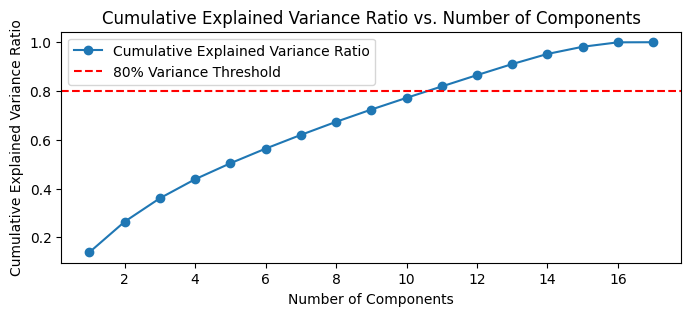

In [ ]:
# TODO: find optimal num components
# to use (n) by plotting explained variance ratio
plt.figure(figsize=(8, 3))
plt.plot(range(1, len(cum_evr) + 1), cum_evr, marker='o', label='Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.legend()
plt.show()

**Final PCA**

We will choose n = 11 to explains at least 80% of total variance in the dataset. We will then re-fit and transform our PCA on the training set using the number of components you decided.

In [ ]:
# TODO: Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n (as deduced from the last step)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
n = 11
pca = PCA(n)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)

# 2. Transform on Testing Set and store it as `x_test_pca`
X_test_pca = pca.transform(X_test_scaled)

Let's run a Logistic Regression and Random Forest Classifier with our PCA dataset!

In [ ]:
# 3. Initialize a Logistic Regression model with default parameters and fit on X_train_pca

log_reg_pca = LogisticRegression(penalty=None, multi_class='multinomial')
log_reg_pca.fit(X_train_pca, y_train)

y_pred = log_reg_pca.predict(X_test_pca)

# TODO: Find the accuracy and store the value in `test_accuracy`

test_accuracy = log_reg_pca.score(X_test_pca, y_test)
pca_confusion_log = confusion_matrix(y_test, y_pred)

print("============LOGISTIC REGRESSION============")
print(test_accuracy)
print(pca_confusion_log)

random_forest_pca = RandomForestClassifier(class_weight='balanced', n_estimators=120, max_depth=30, random_state=42)
random_forest_pca.fit(X_train_pca, y_train)

y_pred = random_forest_pca.predict(X_test_pca)

# TODO: Find the accuracy and store the value in `test_accuracy`

test_accuracy = random_forest_pca.score(X_test_pca, y_test)
pca_confusion_rf = confusion_matrix(y_test, y_pred)
print("============RANDOM FOREST============")
print(test_accuracy)
print(pca_confusion_rf)

============LOGISTIC REGRESSION============
0.42328924576257465
[[  100   552  1262   345     6]
 [   80   906  4127  1992    61]
 [   59   672  8199  9427   427]
 [   13   208  5315 15570  1111]
 [    1    26  1361  8579  1372]]
============RANDOM FOREST============
0.404817794758058
[[  164   582  1147   344    28]
 [  225  1205  3801  1715   220]
 [  179  1189  8468  7564  1384]
 [   36   552  6284 11829  3516]
 [    8   127  1982  5882  3340]]


Hmm... our models aren't performing too well. If the model was guessing, it would be getting these right 20% of the time. However, our model is getting the tests right 40% of the time. Although this is twice as good as guessing, for a 5 class target, this isn't very optimal.

# Random Forest Classifier: Optimization

Let's try running a GridSearch algorithm to see if we can optimize any of the hyperparameters in order to potentially improve our algorithm:

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_estimators': [80, 110, 140],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max depth': [None, 30, 50],
    'max features': ['sqrt', 'log2', None]
}

pgrid = ParameterGrid(param_grid)

cols = ['n_estimators', 'criterion', 'max depth', 'max features', 'accuracy']

param_tuning = pd.DataFrame(columns=cols)

(this cell takes 2 hours to run, we'll comment it out and just load it from a csv file)

In [ ]:
# %%time
# for params in pgrid:
#   rf_gridsearch = RandomForestClassifier(n_estimators=params['n_estimators'],
#                                          criterion=params['criterion'],
#                                          max_depth=params['max depth'],
#                                          max_features=params['max features'],
#                                          random_state=42,
#                                          class_weight='balanced')
#   rf_gridsearch.fit(X_train, y_train)
#   y_pred = rf_gridsearch.predict(X_test)

# # TODO: Find the accuracy and store the value in `test_accuracy`
#   test_accuracy = rf_gridsearch.score(X_test, y_test)
#   print("The accuracy is: {}, n_estimators = {}, criterion = {}, max depth = {}, max features = {}".format(test_accuracy,
#                                                                                                            params['n_estimators'],
#              params['criterion'],
#              params['max depth'],
#              params['max features']))
#   new_row = [params['n_estimators'],
#              params['criterion'],
#              params['max depth'],
#              params['max features'],
#              test_accuracy]
#   param_tuning.loc[len(param_tuning)] = new_row

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

param_tuning = pd.read_csv('/content/drive/MyDrive/param_tuning.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's observe some of the results of our parameter tuning:

In [ ]:
corr_df = param_tuning.drop(columns=['Unnamed: 0'])

In [ ]:
corr_df = corr_df.replace({'sqrt': 0, 'log2': 1, 'gini': 0, 'entropy': 1, 'log_loss': 2})
corr_df['max features'] = corr_df['max features'].fillna(2)
corr_df['max depth'] = corr_df['max depth'].fillna(120)


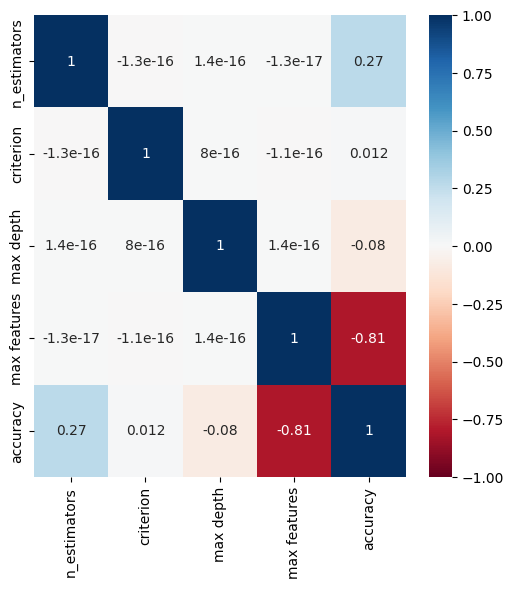

In [ ]:
corr_mat = corr_df.corr()
plt.figure(figsize=(6,6))
dataplot = sns.heatmap(corr_mat, vmin = -1, vmax = 1, cmap='RdBu', annot=True)
plt.show()

Our correlation heatmap doesn't look too great... We see a negative correlation between the max features and accuracy and a slight positive correlation between n_estimators and accuracy. However, this seems to be the only relevant correlations between these columns and accuracy. Let's observe what the differences are on a graph:

In [ ]:
param_tuning['max features'] = param_tuning['max features'].fillna('default')
param_tuning['max depth'] = param_tuning['max depth'].fillna('default')

In [ ]:
n_estimators_data = param_tuning.groupby('n_estimators')['accuracy'].mean().reset_index()
n_estimators_data.head()

,n_estimators,accuracy
0,80,0.399637
1,110,0.401764
2,140,0.402428


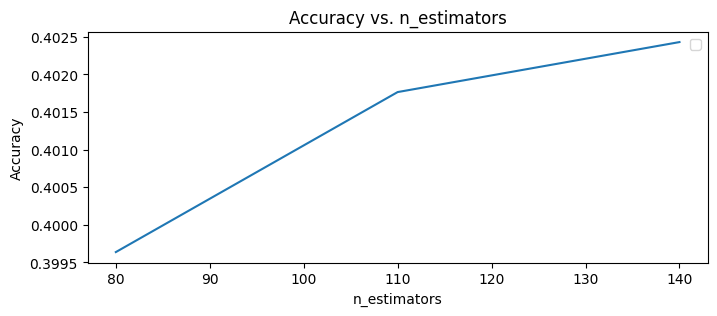

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(n_estimators_data['n_estimators'], n_estimators_data['accuracy'])

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.legend()
plt.show()

In [ ]:
max_features_data = param_tuning.groupby('max features')['accuracy'].mean().reset_index()
max_features_data.head()

,max features,accuracy
0,default,0.395714
1,log2,0.404058
2,sqrt,0.404058


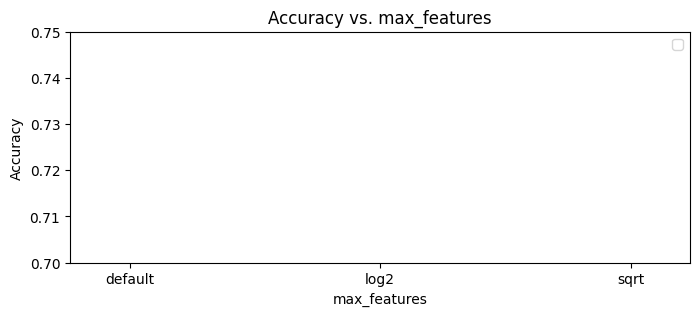

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(max_features_data['max features'], max_features_data['accuracy'], width = 0.25)
ax = plt.gca()
ax.set_ylim([0.7, 0.75])

plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_features')
plt.legend()
plt.show()

We can observe that while changing our hyperparameters, although there is some correlation between increasing our n_estimators and our max_features, we observe major diminishing returns. Let's take a look at one of our previous confusion matrices to observe why!

In [ ]:
pca_confusion_rf

array([[  164,   582,  1147,   344,    28],
       [  225,  1205,  3801,  1715,   220],
       [  179,  1189,  8468,  7564,  1384],
       [   36,   552,  6284, 11829,  3516],
       [    8,   127,  1982,  5882,  3340]])

There seems to be a lot of false readings when it comes to identifying the "Good", "Very Good", and "Excellent" categories! This is in part due to the fact that there isn't really much in our data to distinguish from these three categories! The difference between people with good health and people with very good and excellent is so negligible that our model cannot accurately predict those three classes (it is just guessing!)

# Random Forest Classifier: Data Reconfiguration

Since we aren't very concerned with how our model identifies the top three health classes, we can combine those into 1 and train our model again to observe the results. We also have to combine the Poor and Fair categories, however, in order to still have enough training data while having a balanced Dataset.

In [ ]:
health_rating_condensed_df = patients_cleaned_df.copy()
health_rating_condensed_df['health_rating'] = health_rating_condensed_df['health_rating'].apply(lambda e: 0 if e <= 1 else 1)
health_rating_condensed_df.groupby('health_rating').count().reset_index()
health_rating_condensed_df['health_rating'].unique()
# patients_cleaned_df['health_rating'].unique()
#

array([0, 1])

In [ ]:
X_train_sample_class_0 = health_rating_condensed_df[health_rating_condensed_df['health_rating'] == 0][:47000]
X_train_sample_class_1 = health_rating_condensed_df[health_rating_condensed_df['health_rating'] == 1][:47000]
X_train_sample_class_2 = health_rating_condensed_df[health_rating_condensed_df['health_rating'] == 2][:47000]
X_train_sample_class_3 = health_rating_condensed_df[health_rating_condensed_df['health_rating'] == 3][:47000]
X_train_sample_class_4 = health_rating_condensed_df[health_rating_condensed_df['health_rating'] == 4][:47000]

combined = pd.concat([X_train_sample_class_0, X_train_sample_class_1, X_train_sample_class_2, X_train_sample_class_3, X_train_sample_class_4])


# Stores features dataframe into variable called "features"
features = combined.drop(columns=['health_rating'])

# Store the classification target variable into "target"
target = combined['health_rating']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.8, random_state = 42)

Now lets try training a Vanilla Random Forest Classifier:

In [ ]:
combined.head()

,health_rating,age_range,height_cm,weight_kg,bmi,alcohol_consumed,fruit_consumed,vegetable_consumed,fried_potato_consumed,exercises,has_heart_disease,has_skin_cancer,has_other_cancer,has_depression,has_diabetes,has_arthritis,has_smoked,is_male
0,0,10,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,0,0,0,0,1,1,0
3,0,11,180.0,93.44,28.73,0.0,30.0,30.0,8.0,1,1,0,0,0,1,0,0,1
6,0,8,175.0,69.85,22.74,0.0,16.0,8.0,0.0,1,1,0,0,0,0,1,1,1
8,0,9,163.0,72.57,27.46,0.0,12.0,12.0,4.0,0,0,0,0,1,0,0,1,0
9,0,10,163.0,91.63,34.67,0.0,12.0,12.0,1.0,0,0,0,0,0,1,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# TODO: Initialize model with given parameters and fit it on the training set
random_forest = RandomForestClassifier(class_weight='balanced', n_estimators=140, max_depth=30, random_state=42)
random_forest.fit(X_train, y_train)

# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
rf_pred = random_forest.predict(X_test)

# TODO: Find the accuracy and store the value in `rf_acc`
rf_acc = accuracy_score(y_test, rf_pred)

# TODO: Compute the confusion matrix.
rf_confusion = confusion_matrix(y_test, rf_pred)

# self-check
rf_acc, rf_confusion

(0.7403723404255319,
 array([[28457,  9068],
        [10456, 27219]]))

In [ ]:
# Manual verification that our model isn't just guessing one class

test = health_rating_condensed_df[health_rating_condensed_df['health_rating'] == 0]
answer = test['health_rating']
test = test.drop(columns='health_rating')

rf_pred = random_forest.predict(test)

rf_acc = accuracy_score(answer, rf_pred)
print("Poor and Fair classification: " + str(rf_acc))

test = health_rating_condensed_df[health_rating_condensed_df['health_rating'] == 1]
answer = test['health_rating']
test = test.drop(columns='health_rating')

rf_pred = random_forest.predict(test)

rf_acc = accuracy_score(answer, rf_pred)
print("Good and greater classification: " + str(rf_acc))

Poor and Fair classification: 0.8063257037398442
Good and greater classification: 0.7017228796429676


Great! Our model is now able to differentiate classes. Let's run a gridsearch to further optimize this model with hyperparameters:

In [ ]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_estimators': [90, 120, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max depth': [None, 30, 50],
    'max features': ['sqrt', 'log2', None]
}

pgrid = ParameterGrid(param_grid)

cols = ['n_estimators', 'criterion', 'max depth', 'max features', 'accuracy']

param_tuning = pd.DataFrame(columns=cols)

(This cell also takes quite a long time to run, we will just load the results from the csv generated)

In [ ]:
# %%time
# for params in pgrid:
#   rf_gridsearch = RandomForestClassifier(n_estimators=params['n_estimators'],
#                                          criterion=params['criterion'],
#                                          max_depth=params['max depth'],
#                                          max_features=params['max features'],
#                                          random_state=42,
#                                          class_weight='balanced')
#   rf_gridsearch.fit(X_train, y_train)
#   y_pred = rf_gridsearch.predict(X_test)

# # TODO: Find the accuracy and store the value in `test_accuracy`
#   test_accuracy = rf_gridsearch.score(X_test, y_test)
#   print("The accuracy is: {}, n_estimators = {}, criterion = {}, max depth = {}, max features = {}".format(test_accuracy,
#                                                                                                            params['n_estimators'],
#              params['criterion'],
#              params['max depth'],
#              params['max features']))
#   new_row = [params['n_estimators'],
#              params['criterion'],
#              params['max depth'],
#              params['max features'],
#              test_accuracy]
#   param_tuning.loc[len(param_tuning)] = new_row
# param_tuning.to_csv('second_param_tuning.csv')

Let's find out what the best hyperparameters are! We will use the same approach as last time with our baseline Random Forest model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

param_tuning = pd.read_csv('/content/drive/MyDrive/second_param_tuning.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
corr_df = param_tuning.drop(columns=['Unnamed: 0'])
corr_df = corr_df.replace({'sqrt': 0, 'log2': 1, 'gini': 0, 'entropy': 1, 'log_loss': 2})
corr_df['max features'] = corr_df['max features'].fillna(2)
corr_df['max depth'] = corr_df['max depth'].fillna(120)


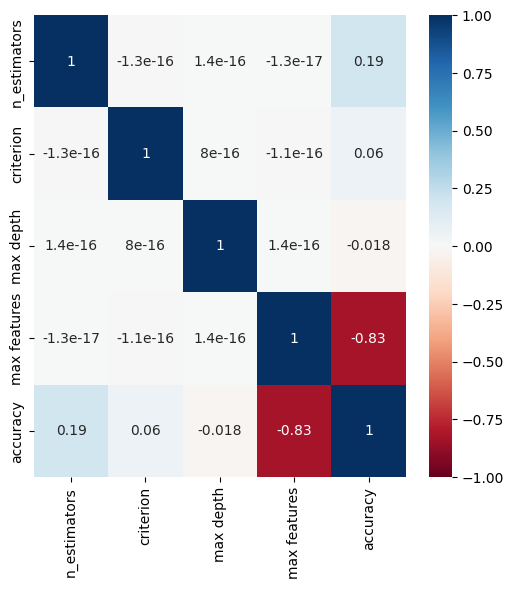

In [ ]:
corr_mat = corr_df.corr()
plt.figure(figsize=(6,6))
dataplot = sns.heatmap(corr_mat, vmin = -1, vmax = 1, cmap='RdBu', annot=True)
plt.show()

In [ ]:
param_tuning['max features'] = param_tuning['max features'].fillna('default')
param_tuning['max depth'] = param_tuning['max depth'].fillna('default')

In [ ]:
n_estimators_data = param_tuning.groupby('n_estimators')['accuracy'].mean().reset_index()
n_estimators_data.head()

,n_estimators,accuracy
0,90,0.735921
1,120,0.737213
2,150,0.737678


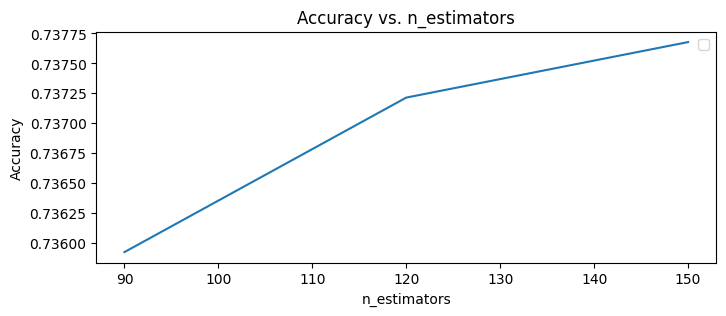

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(n_estimators_data['n_estimators'], n_estimators_data['accuracy'])

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.legend()
plt.show()

In [ ]:
max_features_data = param_tuning.groupby('max features')['accuracy'].mean().reset_index()
max_features_data.head()

,max features,accuracy
0,default,0.731770
1,log2,0.739521
2,sqrt,0.739521


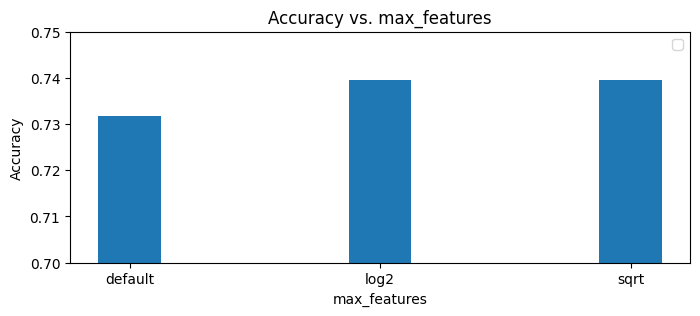

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(max_features_data['max features'], max_features_data['accuracy'], width = 0.25)
ax = plt.gca()
ax.set_ylim([0.7, 0.75])

plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_features')
plt.legend()
plt.show()

From these figures, we can observe that our model doesn't actually get too many returns from these various hyperparameter tuning. The best hyperparameters (on average) are the ones with the largest n_estimators, the sqrt max_features, and no limit on max_depth.

# Section 4: k-Means Clustering +

Using the dataframe created in the base line model `features` we are going to make an **Elbow** **Plot** with clusters ranging from 2 - 10 to find the best fit.

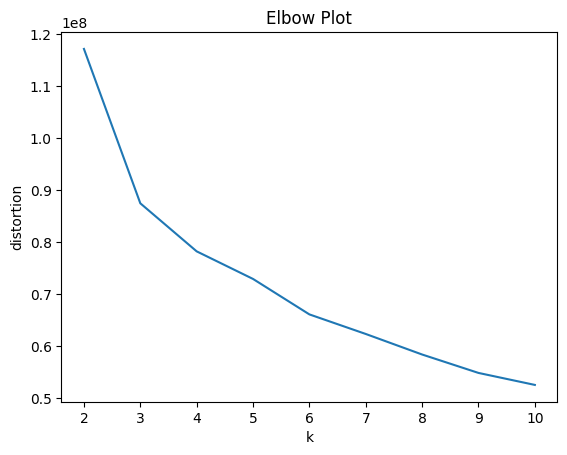

In [ ]:
# Import the necessary libraries
from sklearn.cluster import KMeans
# create a distortion_df
wcss = []
distortion_df = pd.DataFrame(columns=['k', 'distortion'])
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state = 0, n_init = 5)
  kmeans.fit(features)
  dist_val = kmeans.inertia_
  new_distortion = pd.DataFrame({'k': [k], 'distortion': [dist_val]})
  distortion_df = pd.concat([distortion_df, new_distortion], ignore_index = True)
  wcss.append(dist_val)

sns.lineplot(distortion_df, x = 'k', y = 'distortion')
plt.title('Elbow Plot')
plt.show()

3 is the best number of clusters and we use it here to fit the `features` df created in the base line mode.

In [ ]:
number_of_clusters = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=number_of_clusters, random_state = 0, n_init = 5)
kmeans.fit(features)

KMeans(n_clusters=3, n_init=5, random_state=0)

# **Section 5: Comparing Results with AutoML**

(It took me a couple of hours to figure out all of the packages we needed, eventually this ended up working after we restarted the runtime)

In [ ]:
# 1. uninstall all affected packages
!pip uninstall -y Cython scipy pyparsing scikit_learn imbalanced-learn mlxtend yellowbrick

# 2. install packages to be downgraded
!pip install Cython==0.29.36 scipy==1.9 pyparsing==2.4

In [ ]:
!pip install scikit-learn==0.24.2 --no-build-isolation

In [ ]:
!pip install auto-sklearn

for _ in range(3):
    try:
        import autosklearn.classification
        break
    except:
        pass
else:
    raise ImportError("failed to import from autosklearn")

  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=3be823346a80c8fc79f693fef6f1712e9e6716a0ec8ee0a690959deb6a402cc6
  Stored in directory: /root/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
Successfully built auto-sklearn


To create an AutoML classifier, we can just simply call the constructor from the classification library and it will figure out the optimal hyperparameters.

In [ ]:
# Stores features dataframe into variable called "features"
features = patients_cleaned_df.drop(columns=['health_rating'])

# Store the classification target variable into "target"
target = patients_cleaned_df['health_rating']

seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

In [ ]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)

[WARNING] [2023-12-11 23:53:31,237:Client-EnsembleBuilder] No runs were available to build an ensemble from


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score", accuracy_score(y_test, predictions))

Accuracy score 0.4312865260397274


We can see that with all 5 of our classes, even AutoML can't really find a way to break past a greater than 45% accuracy with all of its optimization measures. This further supports our initial idea that our initial training data was not sufficient when it came to training our models.

Now let's try training on our updated, balanced, and sampled dataset.

In [ ]:
# Stores features dataframe into variable called "features"
features = combined.drop(columns=['health_rating'])

# Store the classification target variable into "target"
target = combined['health_rating']

seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

In [ ]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score", accuracy_score(y_test, predictions))

Accuracy score 0.7482978723404256


Even with 2 classes, AutoML still obtains an accuracy close to what we obtained!

# **Section 6: Conclusion**

In [ ]:
print("Yay!")

Yay!


In conclusion, we constructed a total of 5 models in order to solve this problem. These models included:



*   Baseline Logistic Regression (+ with PCA)
*   Baseline Random Forest Classifier (+ with PCA)
*   Improved Random Forest Classifier (Binary Classifier)
*   AutoML Random Forest Classifier
*   AutoML Random Forest Classifier (Binary Classifier)

Our baseline models (and the initial AutoML model) was able to identify the 5 classes at a 40% accuracy. While these models were performing better than guessing on average (where guessing will yield 20% on average), we were not very satisfied with the model's performance. After attempting to improve our Random Forest Classifier by using hyperparameter tuning, we were still not seeing the results we wanted to see.

We ended up looking at our confusion matrix and observed that there were two problems:

1. There were a lot of false readings for the top three categories, where the lines between "Good", "Very Good", and "Excellent" were extremely blurry, making it quite difficult for the model to distinguish.

2. There was not enough data for "Poor" and "Fair", thereby making the model overfit and only guessing the top three categories, as it would only yield a top three category, as that is more statistically likely to succeed.

In order to solve this, we had to shift our focus from a Multiclass classifier to a Binary Classifier in order for there to be enough data such that when we sample our data, we will get an equal distribution of both classes.

Overall, this project taught us the struggles of working with external data. Due to the binary nature of this data, we were not able to generate new rows for our bottom two data points, as there are no data points able to be generated between a 0 and 1 value (there is no in-between binary value).

We were able to directly observe the effects of using this data with the AutoML models; even these models that are supposed to be able to use state-of-the-art optimization tools could not increase our accuracy to above 45% using our base dataset.

When working on our future models, we will make sure to keep in mind the importance of a balance in data and the definition of clear and distinguishiable classes.